#  Exploratory Analysis on which cities has the most volatile markets
### Paul Samaniego

In [1]:
import pandas as pd
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import project1scripts

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\Saman\Coolest-project-1


In [3]:
filename = "clean_median_sale_price_v2_df.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,38066700,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,47166700,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,21233300,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,18112500,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,17865000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [4]:
#Author: anderoos
df['StateName'] = df['StateName'].astype('str')
# Define categories
northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
southwest = ['TX', 'OK', 'AR']
# Filters state codes into separate dataframes

def USRegion(value):
    if value in northeast:
        return "northeast"
    elif value in southeast:
        return "southeast"
    elif value in midwest:
        return "midwest"
    elif value in west:
        return "west"
    elif value in southwest:
        return "southwest"



df.insert(loc=0, column = "US Region", value = df["StateName"].apply(USRegion))

df.head()
    

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,northeast,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,west,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,midwest,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,southwest,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,southwest,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [5]:
df_regions_southeast = df[df["US Region"] == "southeast"]
df_regions_southeast.head()

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
5,southeast,"Washington, DC",VA,32366700.0,32000000.0,32500000.0,34000000,35833300,37443900,38094900,...,48641700,47808300,47225000,46041700,46208300,47566700,50273300,52606700,54331700,54666700
7,southeast,"Miami, FL",FL,16333300.0,16166700.0,16233300.0,16933300,17800000,18766700,19500000,...,41333300,41166700,40833300,40866700,41366700,42533300,43633300,44580000,45580000,45880000
8,southeast,"Atlanta, GA",GA,14191800.0,14500000.0,15050000.0,16183300,17350000,18083300,18746700,...,36183300,35516700,35116700,34433300,34393300,34760000,35826700,36700000,37733300,38333300
17,southeast,"Tampa, FL",FL,12330000.0,12256700.0,12493300.0,12826700,13396700,13830000,14496700,...,36496700,35863300,35666700,34996700,35163300,35493300,36163300,36663300,37166700,37500000
19,southeast,"Baltimore, MD",MD,23333300.0,22833300.0,22833300.0,23663300,24826700,25958300,26795000,...,34666700,33700000,32933300,32600000,32750000,33319300,34486000,36002700,37366700,38033300


In [6]:
#calculating the rolling 12 month average, for the the first 11 months just doing the minimum
southeast_cities_df = df_regions_southeast.drop(columns=["US Region", "StateName"]).set_index("RegionName")
southeast_cities_df = southeast_cities_df.drop(labels=["Somerset, KY"], axis=0)
moving_avg_southeast_df = southeast_cities_df.rolling(window=12, axis=1, min_periods=1).mean()
#moving_avg_southeast_df.to_csv("testing.csv")
moving_avg_southeast_df.head()


C:\Users\Saman\AppData\Local\Temp\ipykernel_43172\2838579502.py:4: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  moving_avg_southeast_df = southeast_cities_df.rolling(window=12, axis=1, min_periods=1).mean()


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Washington, DC",32366700.0,32183350.0,3.228890e+07,32716675.0,33340000.0,3.402398e+07,3.460554e+07,35020875.0,3.519089e+07,35211800.0,...,4.884445e+07,4.897014e+07,4.906112e+07,4.914792e+07,4.925764e+07,4.935695e+07,4.941792e+07,4.944208e+07,4.952528e+07,4.968918e+07
"Miami, FL",16333300.0,16250000.0,1.624443e+07,16416650.0,16693320.0,1.703888e+07,1.739047e+07,17712500.0,1.794074e+07,18073340.0,...,3.969168e+07,4.011529e+07,4.045557e+07,4.075696e+07,4.104446e+07,4.135973e+07,4.169445e+07,4.200389e+07,4.231333e+07,4.260333e+07
"Atlanta, GA",14191800.0,14345900.0,1.458060e+07,14981275.0,15455020.0,1.589307e+07,1.630073e+07,16581050.0,1.672501e+07,16757180.0,...,3.599500e+07,3.615889e+07,3.625612e+07,3.630612e+07,3.633862e+07,3.635014e+07,3.633945e+07,3.627681e+07,3.621292e+07,3.617888e+07
"Tampa, FL",12330000.0,12293350.0,1.236000e+07,12476675.0,12660680.0,1.285557e+07,1.309001e+07,13295425.0,1.344593e+07,13522010.0,...,3.500918e+07,3.541028e+07,3.573945e+07,3.596557e+07,3.614028e+07,3.627306e+07,3.637000e+07,3.640305e+07,3.638083e+07,3.633083e+07
"Baltimore, MD",23333300.0,23083300.0,2.299997e+07,23165800.0,23497980.0,2.390803e+07,2.432046e+07,24651025.0,2.488424e+07,25004150.0,...,3.371014e+07,3.379237e+07,3.384931e+07,3.392987e+07,3.405903e+07,3.419675e+07,3.433378e+07,3.444998e+07,3.459651e+07,3.476039e+07


In [7]:
number_of_periods = len(moving_avg_southeast_df.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((moving_avg_southeast_df["7/31/2023"] / 
                           moving_avg_southeast_df["1/31/2013"])**(12/number_of_periods)-1)
})

top_3_cities = growth_rate_by_state["Growth Rate"].nlargest(3).index
bottom_3_cities = growth_rate_by_state["Growth Rate"].nsmallest(3).index

cities_to_plot = [item for sublist in [top_3_cities, bottom_3_cities] for item in sublist]

top_bottom_cities = pd.DataFrame({"RegionName":cities_to_plot}).set_index("RegionName")
cities_to_plot
#growth_rate_by_state.head()
#top_bottom_cities.head()

['Shelbyville, TN',
 'Palatka, FL',
 'Gainesville, GA',
 'Montgomery, AL',
 'Albertville, AL',
 'Morgantown, WV']

In [8]:
top_bottom_cities_combined = growth_rate_by_state.merge(moving_avg_southeast_df[["1/31/2013", "7/31/2023"]], on="RegionName", how="left")
df_to_plot = top_bottom_cities_combined[top_bottom_cities_combined.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
df_to_plot

,Growth Rate,1/31/2013,7/31/2023
RegionName,,,
"Montgomery, AL",0.008952,176667.0,194141.750000
"Gainesville, GA",0.112681,118000.0,365291.166667
"Morgantown, WV",0.020501,181328.0,224770.833333
"Albertville, AL",0.010022,179567.0,199554.916667
"Palatka, FL",0.117879,61383.0,199629.916667
"Shelbyville, TN",0.127742,78083.0,278682.916667


In [9]:
#bars = plt.bar(df_to_plot.index, df_to_plot["7/31/2023"])

#for i, bar in enumerate(bars):
#    growth_rate = df_to_plot['Growth Rate'].iloc[i]
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'{growth_rate:.2%}', ha="center")

#plt.xlabel("City")
#plt.ylabel("Sales in Thousands")

#plt.title("Top 3 / Bottom 3 Midwest Cities")

#plt.grid(True)
#plt.xticks(rotation=45, ha="right")

#plt.tight_layout()
#plt.show()

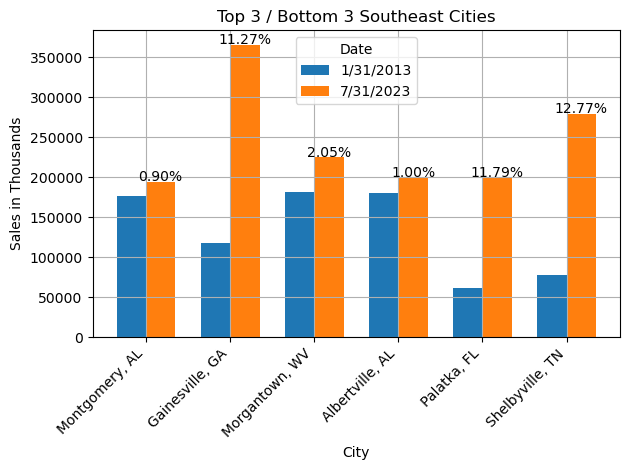

In [13]:
# Extract data
cities = df_to_plot.index
values_1_31_2013 = df_to_plot["1/31/2013"]
values_7_31_2023 = df_to_plot["7/31/2023"]

# Define the width of each bar group
bar_width = 0.35

# Create an array of indices for x-axis positions
x_indices = np.arange(len(cities))

# Create two sets of bars for each city
plt.bar(x_indices - bar_width/2, values_1_31_2013, width=bar_width, label='1/31/2013')
plt.bar(x_indices + bar_width/2, values_7_31_2023, width=bar_width, label='7/31/2023')

# Add labels to the x-axis ticks
plt.xticks(x_indices, cities, rotation=45, ha="right")

# Display the Growth Rate values above each bar
for i, value_7_31_2023 in enumerate(values_7_31_2023):
    growth_rate = df_to_plot['Growth Rate'].iloc[i]
    plt.text(x_indices[i] + bar_width/2, value_7_31_2023 + 1000, f'{growth_rate:.2%}', ha="center")

plt.xlabel("City")
plt.ylabel("Sales in Thousands")
plt.title("Top 3 / Bottom 3 Southeast Cities")

plt.grid(True)
plt.legend(title="Date", loc="upper center")
plt.tight_layout()
plt.savefig("Images/Moving Averages/Cities_by_Region/Growth_Southeast_Cities_bar.png")
plt.show()

In [11]:
top_bottom_cities_combined_line = top_bottom_cities.merge(moving_avg_southeast_df, on="RegionName", how="left")
#df_to_plot_line = top_bottom_cities_combined_line[top_bottom_cities_combined_line.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
#df_to_plot_line
top_bottom_cities_combined_line

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Shelbyville, TN",78083.0,78208.0,80494.333333,84908.25,89823.2,93130.500000,94302.285714,94556.125,94716.555556,94944.9,...,267300.166667,268507.083333,269961.250000,271401.500000,273330.666667,274976.500000,277247.333333,277601.500000,277877.833333,278682.916667
"Palatka, FL",61383.0,60691.5,61516.666667,61575.00,62960.0,65577.833333,67900.000000,69687.500,70596.333333,71088.4,...,189338.916667,191116.750000,194451.500000,196147.333333,198509.833333,198273.750000,198148.500000,196898.250000,197825.750000,199629.916667
"Gainesville, GA",118000.0,116416.5,117611.000000,119741.50,123386.6,127677.666667,131890.428571,134883.250,136096.222222,136816.6,...,343357.583333,346857.833333,348524.750000,350650.000000,352872.250000,355436.166667,357561.166667,359894.500000,362553.916667,365291.166667
"Montgomery, AL",176667.0,177708.5,179305.666667,182333.50,185116.8,187347.333333,190097.714286,192348.000,194227.888889,194803.4,...,197581.250000,197240.250000,197020.833333,196326.416667,195379.250000,194570.916667,194425.083333,194737.583333,194492.416667,194141.750000
"Albertville, AL",179567.0,180808.5,184172.333333,189354.25,193400.0,197472.166667,200082.428571,201561.000,202581.333333,203189.9,...,200212.500000,201020.833333,201606.916667,202757.583333,201729.166667,200381.250000,198899.333333,198352.166667,198323.000000,199554.916667
"Morgantown, WV",181328.0,179578.0,174562.333333,173421.75,173137.4,174225.666667,174741.000000,175252.500,176280.000000,175852.0,...,225800.083333,226605.666667,227546.583333,228673.666667,228701.583333,227816.416667,227175.583333,225093.666667,224649.250000,224770.833333


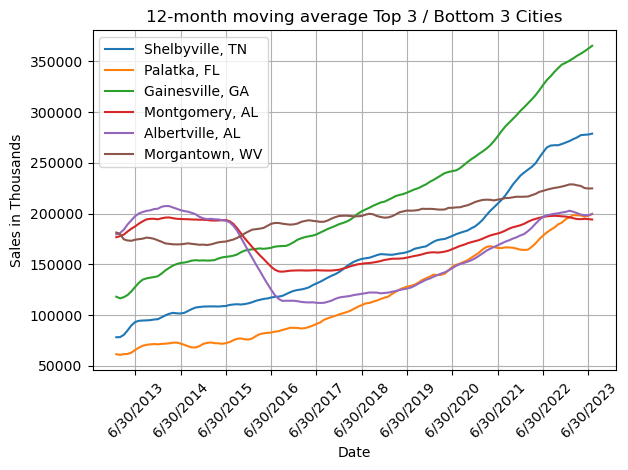

In [14]:
df_transposed = top_bottom_cities_combined_line.transpose()

custom_x_ticks = ["6/30/2013", "6/30/2014", "6/30/2015","6/30/2016", "6/30/2017","6/30/2018",
                  "6/30/2019", "6/30/2020", "6/30/2021", "6/30/2022", "6/30/2023"]

for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("12-month moving average Top 3 / Bottom 3 Cities")
plt.xlabel("Date")
plt.ylabel("Sales in Thousands")
plt.legend()
plt.grid(True)
plt.xticks(custom_x_ticks, rotation=45)
plt.tight_layout()
plt.savefig("Images/Moving Averages/Cities_by_Region/12MMA_Southeast_Cities_line.png")
plt.show()